# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd


**Atributos previsores**

RM: média de comodos

LSTAT: % de pessoas classe baixa

PTRATIO: razao de estudantes e professores nas escolas de ensino fundamental

**Variável alvo**

MEDV: valor médio das casas

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"D:\donwloads\housing.csv",
                    sep=',', encoding='iso-8859-1')

#  Número de linhas e colunas
display('Número de linhas e colunas')
display(df.shape)

df.rename(columns={
    'RM': 'media_comodos',
    'LSTAT': 'percentual_classe_baixa',
    'PTRATIO': 'razao_aluno_professor',
    'MEDV': 'valor_medio_casas'
}, inplace=True)

display(df)

'Número de linhas e colunas'

(489, 4)

,media_comodos,percentual_classe_baixa,razao_aluno_professor,valor_medio_casas
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


## **CORRELAÇÃO LINEAR**

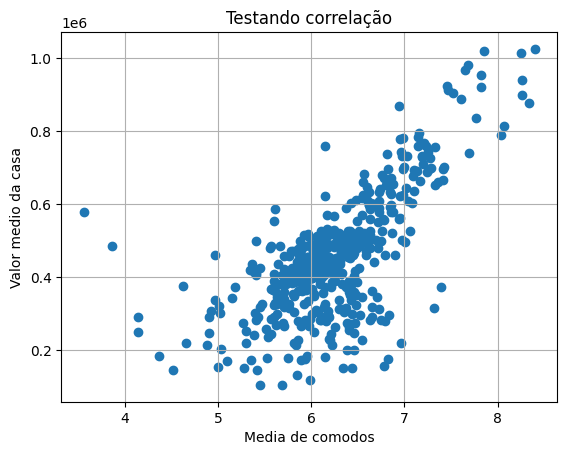

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df.media_comodos,df.valor_medio_casas,)
plt.title('Testando correlação')
plt.xlabel('Media de comodos')
plt.ylabel('Valor medio da casa')
plt.grid(True)
plt.show()

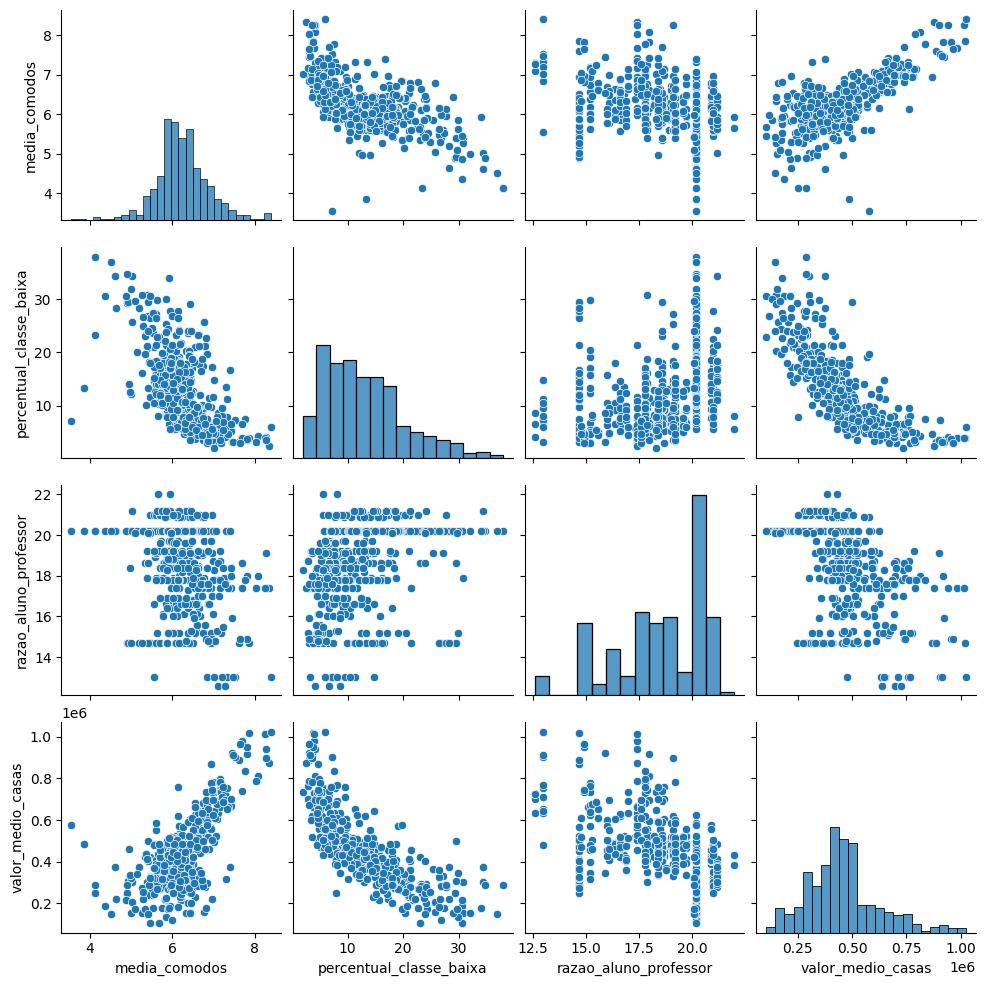

In [4]:
# Analise de normalidade 
import seaborn as sns
sns.pairplot(df)

Text(0.5, 1.0, 'Normal Q-Q plot')

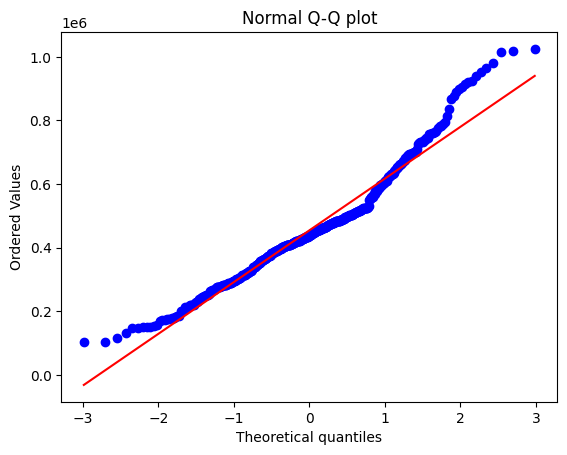

In [5]:
# Gráfico Quantil Quantil QQ 
# é um gráfico com o intuito de ver se os dados estão em distribuição normal: ou seja próximos a média 
import scipy.stats as stats

stats.probplot(df['valor_medio_casas'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
# Os pontos em azul que são os dados para estarem em distribuição normal, deveriam estar o mais perto possível da linha vermelha

In [6]:
import plotly.express as px
hist = px.histogram(df, x='valor_medio_casas', nbins=60)
hist
# No histograma podemos observar que a distribuição não é normal, porque não tem a "Boca de Sino", os dados não estao dispersos entre a média
# Só por não tem distribuição normal, já descartamos o calculo de pearson

### Teste Shapiro-Wilk
##### Ho  = Distribuição Normal: p > 0.05
##### Ha = Distribuição != Normal: p <= 0.05

In [7]:
# Hipoteses
# P-valor > 0.5 distribuição dos dados Normal (Próximos a média)
# P-valor: < 0.5 distribuição dos dados != Normal 


# Esse código tem uma limitação até 5mil registros
stats.shapiro(df.valor_medio_casas)

#  pvalue=2.5759801704018734e-10 número menor que 0.5

ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018734e-10)

In [8]:
# Retorno a saida para cada uma das variaveis
estatistica, p = stats.shapiro(df.valor_medio_casas)
print(f'estatistica do teste: {estatistica}')
print(f'p_valor {p}')

# Como o P-valor é menor que 0.5 a distribuição não é normal.
# Saida do P-valor = p_valor 2.5759801704018734e-10

estatistica do teste: 0.9596616055953767
p_valor 2.5759801704018734e-10


In [9]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


###  Teste de lillieFors (Kolmogorov_Sminorv)

In [10]:
# Caso  Sua base de dados for maior que 5k de registros, temos outro método, para analisar as distribuições

# rever essa biblioteca depois
import statsmodels
from statsmodels.stats.diagnostic import lilliefors


estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.valor_medio_casas, dist = 'norm')
print(f'Estatistica de teste {estatistica}')
print(f'p-valor {p}')

Estatistica de teste 0.11370576407672117
p-valor 0.0009999999999998899


### Analise da correlaçãp Linear

### Pearson (Distribuição Normal)
#### Spearman (Distribuição Não Normal)
#### Kendal (Distribuição Não Normal com quantidade pequenas de amostras < 30)

###### Ho = Não há correlação linear: p > 0,05
###### Ha = Existe correlação Linear: p <= 0,05

In [13]:
from scipy import stats

coef, p = stats.pearsonr(df.media_comodos, df.valor_medio_casas)
print(f'Coeficiente de correlação: {coef}')
print(f'P-valor: {p}')

Coeficiente de correlação: 0.6972092210185155
P-valor: 2.0533141149514788e-72


In [14]:
from scipy import stats

coef, p = stats.spearmanr(df.media_comodos, df.valor_medio_casas)
print(f'Coeficiente de correlação: {coef}')
print(f'P-valor: {p}')

Coeficiente de correlação: 0.6240572939087419
P-valor: 3.845028634343161e-54


In [16]:
# forma de verificar correlação com Pandas, mostrando a correlação entre todas as colunas 
correlacao = df.corr(method='pearson')
correlacao

,media_comodos,percentual_classe_baixa,razao_aluno_professor,valor_medio_casas
media_comodos,1.000000,-0.612033,-0.304559,0.697209
percentual_classe_baixa,-0.612033,1.000000,0.360445,-0.760670
razao_aluno_professor,-0.304559,0.360445,1.000000,-0.519034
valor_medio_casas,0.697209,-0.760670,-0.519034,1.000000


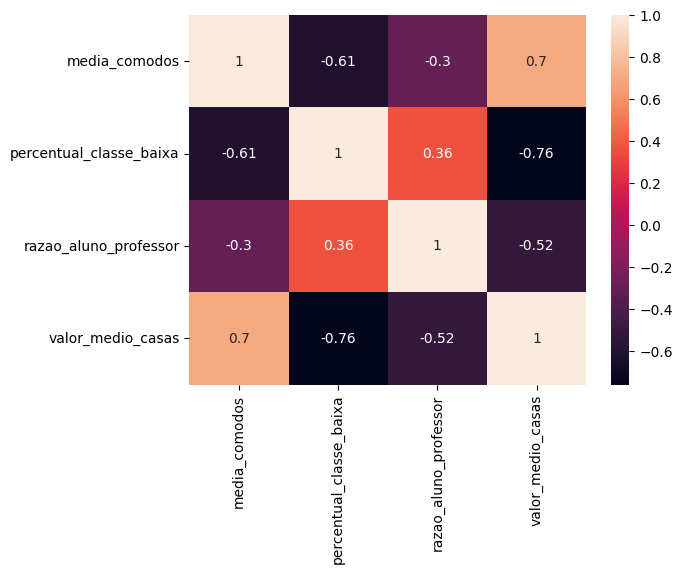

In [20]:
plt.figure()
sns.heatmap(correlacao, annot=True)
plt.show()

In [21]:
df

,media_comodos,percentual_classe_baixa,razao_aluno_professor,valor_medio_casas
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


### Regressão Linear

In [41]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# # Forma de deixar o array em 2D, ou seja uma matriz
# x = df['valor_medio_casas'].values.reshape(-1, 1)
# y = df['media_comodos'].values.reshape(-1, 1)


x = df.iloc[:, 0:1].values
y = df.iloc[:, 3].values

# X é a variavel independente, e Y é a dependente que queremos encontrar
x_treino, x_teste, y_treino, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [42]:
x_teste.shape, y_test.shape

((147, 1), (147,))

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_treino, y_treino)
display(reg.intercept_)
display(reg.coef_)

-626510.2699464138

array([173771.45170999])

### Equação Valor =  (-173771 * Número de comodos) + 626510

In [49]:
# Coeficiente de Determinação dados de treino (Famoso R Quadrado)
reg.score(x_treino, y_treino)

0.46368351515551953

In [51]:
# Coeficiente de Determinação dados de teste (Famoso R Quadrado)
reg.score(x_teste, y_test)

0.5426573915930195

In [54]:
# Todos os valores previstos de treino
previsao_treino = reg.predict(x_treino)
previsao_treino

array([551833.94409904, 468423.64727824, 647755.78544295, 658182.07254555,
       586414.46298932, 464600.67534062, 395265.86610833, 229487.901177  ,
       441141.52935977, 424980.78435074, 523161.65456689, 432105.41387085,
       555135.60168153,  44768.84800928, 504915.65213734, 424285.6985439 ,
       565735.66023583, 607962.12300136, 455912.10275512, 442531.70097345,
       505784.50939589, 450003.87339698, 410210.21095539, 390226.49400874,
       472767.93357099, 809884.54988837, 401174.09546647, 639762.29866429,
       465817.07550259, 491882.79325909, 437318.55742215, 416813.52612037,
       413164.32563446, 560870.05958796, 396134.72336688, 459561.30324103,
       335488.4867201 , 521423.94004979, 441315.30081148, 630899.95462708,
       452262.90226921, 557915.94490889, 437144.78597044, 391616.66562242,
       525420.68343912, 459735.07469274, 397872.43788398, 492925.42196935,
       387619.92223309, 533240.39876607, 487538.50696634, 608483.43735649,
       832822.38151409, 4

### Representatividade da regressão em nossos dados

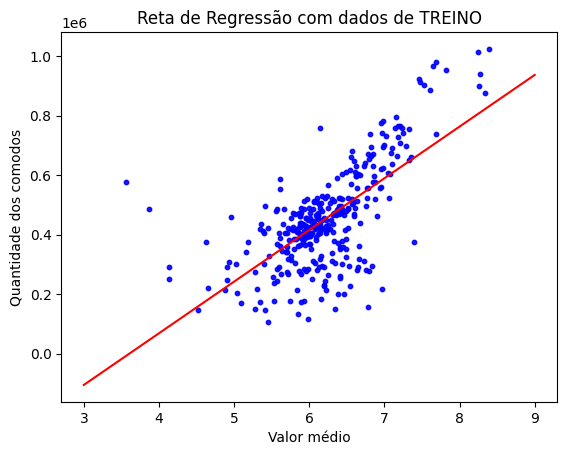

In [59]:
# Monta o gráfico de dispersão, com os dados da tabela, 
# pintando eles de azul, assim como plota somente os dados dos comodos a partir de 3 e parando em 9, permitindo uma melhor visualização
plt.scatter(x=x_treino, y=y_treino, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(3,9)

# Adiciona a linha no gráfico de dispersão, aplicando a regressão para identificar quanto a regressão representa nossos dados
plt.plot(x_plot, x_plot*reg.coef_ + reg.intercept_, color='red')
plt.title('Reta de Regressão com dados de TREINO')
plt.xlabel('Valor médio')
plt.ylabel('Quantidade dos comodos')
plt.show()

### Representatividade da nossa regressão nos dados de teste

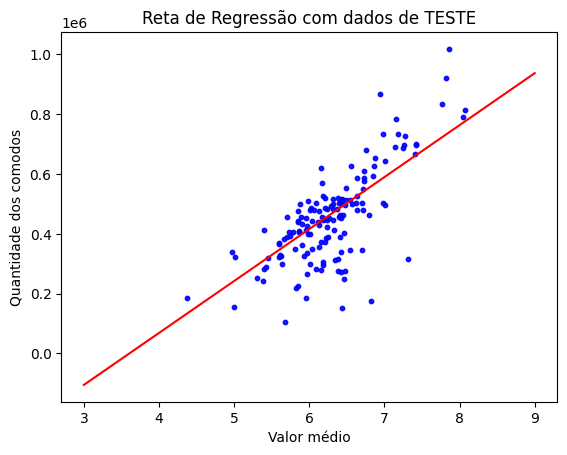

In [60]:
# Monta o gráfico de dispersão, com os dados da tabela, 
# pintando eles de azul, assim como plota somente os dados dos comodos a partir de 3 e parando em 9, permitindo uma melhor visualização
plt.scatter(x=x_teste, y=y_test, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(3,9)

# Adiciona a linha no gráfico de dispersão, aplicando a regressão para identificar quanto a regressão representa nossos dados
plt.plot(x_plot, x_plot*reg.coef_ + reg.intercept_, color='red')
plt.title('Reta de Regressão com dados de TESTE')
plt.xlabel('Valor médio')
plt.ylabel('Quantidade dos comodos')
plt.show()

In [61]:
valor_casa = reg.predict([[9]])
valor_casa

array([937432.79544351])